In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data
df = pd.read_csv('googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


# data cleaning

In [3]:
#clean data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


To deal with missing value

In [4]:
df.dropna(how = 'any', inplace = True)
df.shape
# Or we can also to fillna with the value such as mean() for float and mode() for string

(9360, 13)

To deal with duplicated value

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
sum(df.duplicated())

0

To get the amount of different features

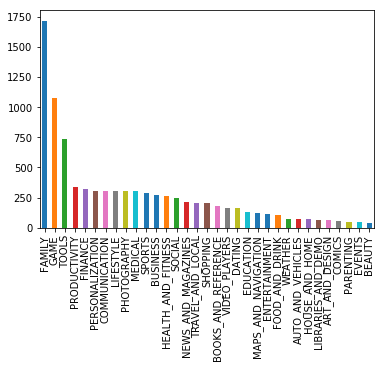

In [10]:
df['Category'].value_counts().plot(kind='bar');

In [8]:
df['Rating'].describe()
# we can see the maximum and minmum make sense.

count    8886.000000
mean        4.187959
std         0.522428
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

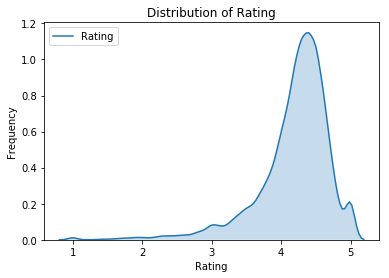

In [12]:
g = sns.kdeplot(df.Rating,shade = True)
g.set_xlabel('Rating')
g.set_ylabel('Frequency')
plt.title('Distribution of Rating');

As we can see, most of apps have a high rating.Then I want to discover the correlation between rating and several features.

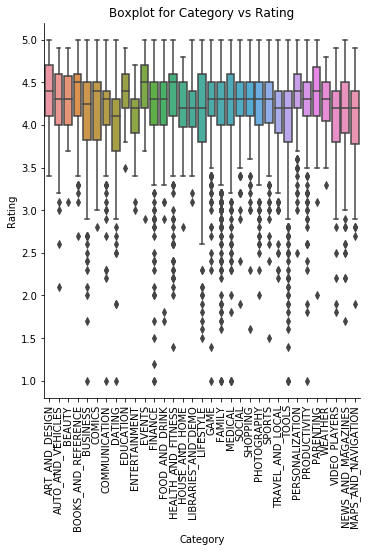

In [25]:
g = sns.catplot(x = 'Category', y = 'Rating', data = df, kind = 'box', height = 6)
g.set_xticklabels(rotation=90);
plt.title('Boxplot for Category vs Rating');

As we can see, it seems that category doesnt have a strong impact on rating.

In [26]:
df['Reviews'].head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [28]:
#Change the type to int
df['Reviews'] = df['Reviews'].apply(lambda x : int(x))
df.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

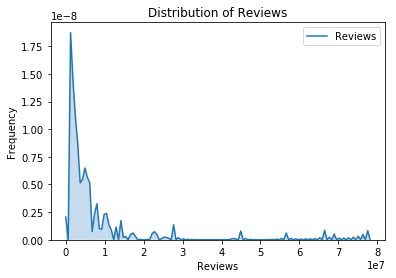

In [32]:
g = sns.kdeplot(df['Reviews'],shade=True)
g.set_xlabel('Reviews')
g.set_ylabel('Frequency')
plt.title('Distribution of Reviews');

Now Im interested which type of apps have most comments.

['Facebook' 'WhatsApp Messenger' 'Instagram'
 'Messenger – Text and Video Chat for Free' 'Clash of Clans'
 'Clean Master- Space Cleaner & Antivirus' 'Subway Surfers' 'YouTube'
 'Security Master - Antivirus, VPN, AppLock, Booster' 'Clash Royale']


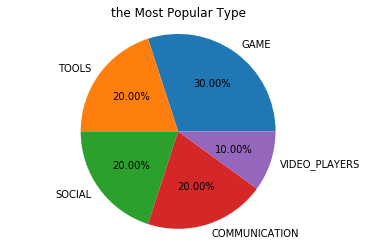

In [96]:
sorted_reviews = df.sort_values(by=['Reviews'],ascending=False).drop_duplicates(subset='App')[:10]
print(sorted_reviews['App'].values)
plt.pie(sorted_reviews['Category'].value_counts(),labels=list(sorted_reviews['Category'].value_counts().index),autopct="%1.2f%%")
plt.title('the Most Popular Type')
plt.axis('equal');

Now I am tring to find out the correlation between Review and Rating

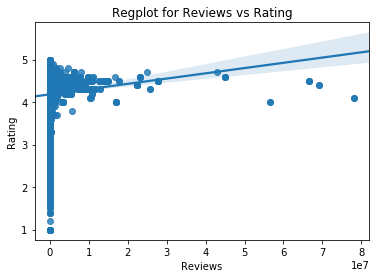

In [49]:
g = sns.regplot(x = 'Reviews', y = 'Rating', data = df)
#g.set_xticklabels(rotation=90);
plt.title('Regplot for Reviews vs Rating');

Since there are only few points having reviews greater than 10000000, we limit the reviews to be less than 10000000

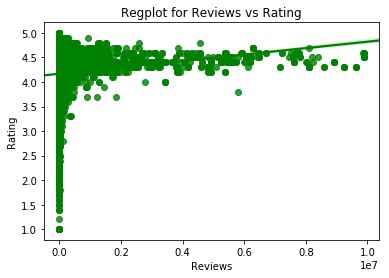

In [51]:
g = sns.regplot(x = 'Reviews', y = 'Rating', color='green',data = df[df.Reviews < 10000000])
#g.set_xticklabels(rotation=90);
plt.title('Regplot for Reviews vs Rating');

The correlation still seams so weak. The reason why the slope is positive is there are so many points having Reviews around 0 and a huge range of rating

Until now we cant make a conclusion about how to build a popular app. Those features dont look like have an obvious relationship with Rating.